In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
import math as mt
import openpyxl as wr

In [3]:

x = 2+1+7+2+1+1+6
y = x/3
L1 = 0.05 * x
L2 = L1 * 1.5
L3 = L1 * 0.5
L = L1 + L2 + L3
p = 0.05 * x
py =  mt.sin(45) * p 
px =  mt.cos(45) * p  
w = (0.005*x)+(0.01*y)

x, L1, L2, L3, py, px, w, p, L

(20,
 1.0,
 1.5,
 0.5,
 0.8509035245341184,
 0.5253219888177297,
 0.16666666666666669,
 1.0,
 3.0)

In [4]:
## Equilibrio externo

## sumatoria de fuerzas en x
Ax, Ay , MA = sp.symbols('AX, Ay, MA')

Fy = py + Ay - L1 * w/2 - L2 * w - 0.167*L3/2
eq_y = sp.Eq(Fy, 0)
AY = sp.solve(Fy)[0]

Fx = Ax - px 
eq_x = sp.Eq(Fx, 0)
AX= sp.solve(Fx)[0]

M = MA - w*L1*L1/3 - w*L2*(L1+L2/2) - w* L3 *(L3/3 + L1 + L2) + py *(L)
eq_M = sp.Eq(M, 0)
Ma = sp.solve(M)[0]

print("la fuerza Ay es igual a " + str(AY) + " Kn")
print("la fuerza Ax es igual a " + str(AX) + " Kn")
print("la fuerza Ma es igual a " + str(Ma) + " Kn")

la fuerza Ay es igual a -0.475820191200785 Kn
la fuerza Ax es igual a 0.525321988817730 Kn
la fuerza Ma es igual a -1.83743279582458 Kn


La ecuacion de cortante tramo 1 es igual a V1= 0.0833333333333333*x**2 - 0.475820191200785   (0 < x < 1.0)
La ecuacion de cortante tramo 2 es igual a V2= 0.166666666666667*x + 0.0833333333333333   (0 < x < 1.5)
La ecuacion de cortante tramo 3 es igual a V3= 0.0833333333333333*x**2 + 1.18423685786745   (0 < x < 0.5)


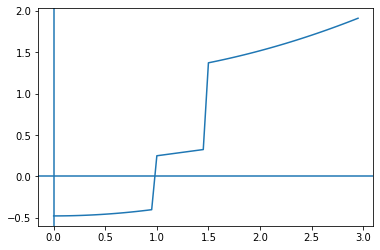

In [5]:
## Ecuaciones y diagramas de cortante

##x = np.arange(0, 2.8, 0.05)
##tramo1 = lambda x: -3.2 * x ** 3 +  2.8 * x - 2.85
x = sp.symbols("x")

#V1_Tramo_1 =  (sp.integrate(w*x, (x))) + Ay  # 0 x L1
#V2_Tramo_2 =  (sp.integrate(w, (x))) + V1_Tramo_1.subs(x, L1)  # 0 x L2
#V3_Tramo_3 =  (sp.integrate(w*x, (x))) + py + V2_Tramo_2.subs[(x, L2)]  # 0 x L3

V1_Tramo_1 =  (w * x ** 2 / 2 + AY)  # 0 x L1
V2_Tramo_2 =  (w * x + w * L1 ** 2 / 2)  # 0 x L2
V3_Tramo_3 =  (w * x ** 2 / 2 + py + w * L2 + w * L1 ** 2 / 2)  # 0 x L3

print("La ecuacion de cortante tramo 1 es igual a " + "V1= " + str(V1_Tramo_1) + "   (0 < x < " + str(L1) + ")")
print("La ecuacion de cortante tramo 2 es igual a " + "V2= " + str(V2_Tramo_2) + "   (0 < x < " + str(L2) + ")")
print("La ecuacion de cortante tramo 3 es igual a " + "V3= " + str(V3_Tramo_3) + "   (0 < x < " + str(L3) + ")")

##

#Edward Ramírez8:36
#tramo1_momento = sp.lambdify(x, momento_1)(x_array[x_array < L1])
#tramo2_momento = sp.lambdify(x, momento_2)(x_array[(x_array >= L1) & (x_array < (L1 + L2) )] - L1)
#tramo3_momento = sp.lambdify(x, momento_3)(x_array[x_array >= (L1 + L2)] - L1 - L2)
##V1 = lambda x: sp.integrate(w*x, (x))) + Ay
##V2 = lambda x: sp.integrate(w*x, (x))) + int(V1_Tramo_1.subs(x, L1)
##V3 = lambda x: sp.Eq((sp.integrate(w*x, (x))) + py + V2_Tramo_2.subs[(x, L2)])  # 0 x L3

x = np.arange(0, 3, 0.05)

V1 = lambda x: w * x **2 / 2 + AY
V2 = lambda x: w * x + w* L1 ** 2 / 2
V3 = lambda x: w * x ** 2 / 2 + py + w * L2 + w * L1 ** 2 / 2

V = np.piecewise(x, [x < L1, (x >= L1) & (x <= L2), x >= L2], [V1, V2, V3])

plt.plot(x, V)

plt.axhline(0)
plt.axvline(0)


In [6]:
np.amax(y)
v_max = np.amin(y)
v_max

6.666666666666667

La ecuacion de momento tramo 1 es igual a M1= 0.0277777777777778*x**3 - 0.475820191200785*x + 1.83743279582458   (0 < x < 1.0)
La ecuacion de momento tramo 2 es igual a M2= 0.166666666666667*x**2 + 0.0277777777777778*x   (0 < x < 1.5)
La ecuacion de momento tramo 3 es igual a M3= 0.0277777777777778*x**3 + 1.18423685786745*x   (0 < x < 0.5)


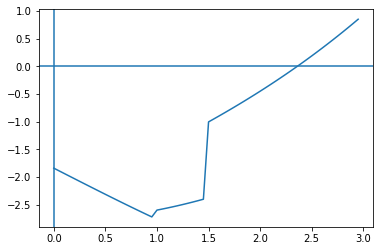

In [20]:
## Ecuaciones y diagramas de momento

##x = np.arange(0, 2.8, 0.05)
##tramo1 = lambda x: -3.2 * x ** 3 +  2.8 * x - 2.85
x = sp.symbols("x")

#V1_Tramo_1 =  (sp.integrate(w*x, (x))) + Ay  # 0 x L1
#V2_Tramo_2 =  (sp.integrate(w, (x))) + V1_Tramo_1.subs(x, L1)  # 0 x L2
#V3_Tramo_3 =  (sp.integrate(w*x, (x))) + py + V2_Tramo_2.subs[(x, L2)]  # 0 x L3

M1_Tramo_1 =  (w * x ** 3 / 6 + AY * x - Ma)  # 0 x L1
M2_Tramo_2 =  (w * x**2 + w * L1 ** 3 * x / 6)  # 0 x L2
M3_Tramo_3 =  (w * x ** 3 / 6 + py * x + w * L2 * x + w * L1 ** 2 * x / 2)  # 0 x L3

print("La ecuacion de momento tramo 1 es igual a " + "M1= " + str(M1_Tramo_1) + "   (0 < x < " + str(L1) + ")")
print("La ecuacion de momento tramo 2 es igual a " + "M2= " + str(M2_Tramo_2) + "   (0 < x < " + str(L2) + ")")
print("La ecuacion de momento tramo 3 es igual a " + "M3= " + str(M3_Tramo_3) + "   (0 < x < " + str(L3) + ")")

##

#Edward Ramírez8:36
#tramo1_momento = sp.lambdify(x, momento_1)(x_array[x_array < L1])
#tramo2_momento = sp.lambdify(x, momento_2)(x_array[(x_array >= L1) & (x_array < (L1 + L2) )] - L1)
#tramo3_momento = sp.lambdify(x, momento_3)(x_array[x_array >= (L1 + L2)] - L1 - L2)
##V1 = lambda x: sp.integrate(w*x, (x))) + Ay
##V2 = lambda x: sp.integrate(w*x, (x))) + int(V1_Tramo_1.subs(x, L1)
##V3 = lambda x: sp.Eq((sp.integrate(w*x, (x))) + py + V2_Tramo_2.subs[(x, L2)])  # 0 x L3

x = np.arange(0, 3, 0.05)

M1 = lambda x: w * x ** 3 / 6 + AY * x * 2 + Ma
M2 = lambda x: w * x**2 + w * L1 ** 3 * x / 6 + AY * 2 * L1 + Ma
M3 = lambda x: w * x ** 3 / 6 + py * x + w * L2 ** 2 + w * L1 ** 3 * L2 / 6 + AY * 2 *L1 + Ma
M = np.piecewise(x, [x < L1, (x >= L1) & (x <= L2), x >= L2], [M1, M2, M3])

plt.plot(x, M)

plt.axhline(0)
plt.axvline(0)


In [21]:
np.amax(M)
M_max = np.amin(M)
M_max

-2.7176751868838496

In [22]:
perfiles = pd.read_excel('T2.xlsx', usecols="C:E", nrows=10, skiprows=3)
perfiles


,h [mm],b [mm],t [mm]
0,25,50,5.0
1,30,60,5.5
2,35,70,6.0
3,40,80,7.0
4,50,100,8.5
5,55,115,9.0
6,60,120,10.0
7,70,140,11.5
8,80,160,13.0
9,90,180,15.0


In [23]:
h = perfiles.loc[1, 'h [mm]']
b = perfiles.loc[1, 'b [mm]']
t = perfiles.loc[1, 't [mm]']

h, b, t

(30, 60, 5.5)

In [24]:
area_1 = b * t
area_2 = (h - t) * t
area_total = area_1 + area_2


Y_C = ((area_1 * (h - t/2) + (area_2 * (h - t / 2))))/(area_1 + area_2)
Y_C, area_total

(27.25, 464.75)

In [25]:
# mm 4
Iz = (b * t ** 3/12 + (area_1) * (h - t/2 - Y_C) ** 2) + (t * (h - t) ** 3/12 + (area_2) * ((h - t)/2 - Y_C) ** 2)
Iz

37890.932291666664

In [26]:
# y_fsup = y de la fibra superior
# y_finf = y de la fibra inferior

y_fsup_area_1 = h - Y_C
y_finf_area_2 = Y_C - (h - t)/2

y_fsup_area_1, y_finf_area_2

(2.75, 15.0)

In [27]:
# Mpa
esfuerzo_1 = M_max * 10 ** 6 * y_fsup_area_1  / Iz
esfuerzo_2 = M_max * 10 ** 6 * y_finf_area_2 / Iz

esfuerzo_1, esfuerzo_2

(-197.23998096437055, -1075.8544416238394)

In [28]:
#area_1 = b * t
#area_2 = (h - t) * t
#area_total = area_1 + area_2

resultado = perfiles
resultado['A1 [mm ^ 2]'] = perfiles['b [mm]']  * perfiles['t [mm]']
resultado

resultado = perfiles
resultado['A2 [mm ^ 2]'] = (perfiles['h [mm]'] - perfiles['t [mm]']) * perfiles['t [mm]']
resultado

resultado = perfiles
resultado['A [mm ^ 2]'] = perfiles['b [mm]']  * perfiles['t [mm]'] + (perfiles['h [mm]'] - perfiles['t [mm]']) * perfiles['t [mm]']
resultado

,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2]
0,25,50,5.0,250.0,100.00,350.00
1,30,60,5.5,330.0,134.75,464.75
2,35,70,6.0,420.0,174.00,594.00
3,40,80,7.0,560.0,231.00,791.00
4,50,100,8.5,850.0,352.75,1202.75
5,55,115,9.0,1035.0,414.00,1449.00
6,60,120,10.0,1200.0,500.00,1700.00
7,70,140,11.5,1610.0,672.75,2282.75
8,80,160,13.0,2080.0,871.00,2951.00
9,90,180,15.0,2700.0,1125.00,3825.00


In [29]:
#Y_C = ((area_1 * (h - t/2) + (area_2 * (h - t / 2))))/(area_1 + area_2)
Y_C = ((area_1 * (h - t/2)) + (area_2 * (h - t / 2)))/(area_1 + area_2)
resultado = perfiles
resultado['YC [mm]'] = (perfiles['A1 [mm ^ 2]']  * (perfiles['h [mm]'] - perfiles['t [mm]'] / 2 ) + (perfiles['A2 [mm ^ 2]'] * (perfiles['h [mm]']) - perfiles['t [mm]'] / 2)) / (perfiles['A1 [mm ^ 2]'] + perfiles['A2 [mm ^ 2]'])
resultado


,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2],YC [mm]
0,25,50,5.0,250.0,100.00,350.00,23.207143
1,30,60,5.5,330.0,134.75,464.75,28.041420
2,35,70,6.0,420.0,174.00,594.00,32.873737
3,40,80,7.0,560.0,231.00,791.00,37.517699
4,50,100,8.5,850.0,352.75,1202.75,46.992933
5,55,115,9.0,1035.0,414.00,1449.00,51.782609
6,60,120,10.0,1200.0,500.00,1700.00,56.467647
7,70,140,11.5,1610.0,672.75,2282.75,65.942065
8,80,160,13.0,2080.0,871.00,2951.00,75.416300
9,90,180,15.0,2700.0,1125.00,3825.00,84.703922


In [30]:
# Iz = (b * t ** 3 / 12 + (area_1) * (h - t/2 - Y_C) ** 2) + (t * (h - t) ** 3/12 + (area_2) * ((h - t)/2 - Y_C) ** 2)
resultado['Iz [mm ^ 4]'] = ((perfiles['b [mm]'] * perfiles['t [mm]'] ** 3 / 12 + perfiles['A1 [mm ^ 2]'] * (perfiles['h [mm]'] - perfiles['t [mm]'] / 2 - perfiles['YC [mm]']) ** 2) + perfiles['t [mm]'] * (perfiles['h [mm]'] - perfiles['t [mm]'])** 3 / 12 + perfiles['A1 [mm ^ 2]'] * ((perfiles['h [mm]'] - perfiles['t [mm]'] / 2 - perfiles['YC [mm]']) ** 2 / 12 + perfiles['A2 [mm ^ 2]'] * ((perfiles['h [mm]'] - perfiles['t [mm]']) / 2 - perfiles['YC [mm]']) ** 2))
resultado

,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2],YC [mm],Iz [mm ^ 4]
0,25,50,5.0,250.0,100.00,350.00,23.207143,4.364705e+06
1,30,60,5.5,330.0,134.75,464.75,28.041420,1.109661e+07
2,35,70,6.0,420.0,174.00,594.00,32.873737,2.468519e+07
3,40,80,7.0,560.0,231.00,791.00,37.517699,5.716784e+07
4,50,100,8.5,850.0,352.75,1202.75,46.992933,2.065527e+08
5,55,115,9.0,1035.0,414.00,1449.00,51.782609,3.550595e+08
6,60,120,10.0,1200.0,500.00,1700.00,56.467647,5.942447e+08
7,70,140,11.5,1610.0,672.75,2282.75,65.942065,1.458437e+09
8,80,160,13.0,2080.0,871.00,2951.00,75.416300,3.183442e+09
9,90,180,15.0,2700.0,1125.00,3825.00,84.703922,6.768781e+09


In [31]:
# y_fsup = y de la fibra superior
# y_finf = y de la fibra inferior
#y_fsup_area_1 = h - Y_C
#y_finf_area_2 = Y_C - (h - t)/2


resultado['y_fsup_A1 [mm]'] = perfiles['h [mm]'] - perfiles['YC [mm]']
resultado['y_finf_A2 [mm]'] = perfiles['YC [mm]'] - (perfiles['h [mm]'] - perfiles['t [mm]'] ) / 2

resultado

,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2],YC [mm],Iz [mm ^ 4],y_fsup_A1 [mm],y_finf_A2 [mm]
0,25,50,5.0,250.0,100.00,350.00,23.207143,4.364705e+06,1.792857,13.207143
1,30,60,5.5,330.0,134.75,464.75,28.041420,1.109661e+07,1.958580,15.791420
2,35,70,6.0,420.0,174.00,594.00,32.873737,2.468519e+07,2.126263,18.373737
3,40,80,7.0,560.0,231.00,791.00,37.517699,5.716784e+07,2.482301,21.017699
4,50,100,8.5,850.0,352.75,1202.75,46.992933,2.065527e+08,3.007067,26.242933
5,55,115,9.0,1035.0,414.00,1449.00,51.782609,3.550595e+08,3.217391,28.782609
6,60,120,10.0,1200.0,500.00,1700.00,56.467647,5.942447e+08,3.532353,31.467647
7,70,140,11.5,1610.0,672.75,2282.75,65.942065,1.458437e+09,4.057935,36.692065
8,80,160,13.0,2080.0,871.00,2951.00,75.416300,3.183442e+09,4.583700,41.916300
9,90,180,15.0,2700.0,1125.00,3825.00,84.703922,6.768781e+09,5.296078,47.203922


In [32]:
##esfuerzo = M_max * 10 ** 6 * y_area_2 / Iz

resultado['esfuerzo_sup [MPa]'] = M_max * 10 ** 6  * resultado['y_fsup_A1 [mm]'] /  resultado['Iz [mm ^ 4]']
resultado['esfuerzo_inf [MPa]'] = M_max * 10 ** 6  * resultado['y_finf_A2 [mm]'] /  resultado['Iz [mm ^ 4]']


resultado

,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2],YC [mm],Iz [mm ^ 4],y_fsup_A1 [mm],y_finf_A2 [mm],esfuerzo_sup [MPa],esfuerzo_inf [MPa]
0,25,50,5.0,250.0,100.00,350.00,23.207143,4.364705e+06,1.792857,13.207143,-1.116319,-8.223402
1,30,60,5.5,330.0,134.75,464.75,28.041420,1.109661e+07,1.958580,15.791420,-0.479677,-3.867483
2,35,70,6.0,420.0,174.00,594.00,32.873737,2.468519e+07,2.126263,18.373737,-0.234087,-2.022826
3,40,80,7.0,560.0,231.00,791.00,37.517699,5.716784e+07,2.482301,21.017699,-0.118005,-0.999151
4,50,100,8.5,850.0,352.75,1202.75,46.992933,2.065527e+08,3.007067,26.242933,-0.039565,-0.345286
5,55,115,9.0,1035.0,414.00,1449.00,51.782609,3.550595e+08,3.217391,28.782609,-0.024626,-0.220306
6,60,120,10.0,1200.0,500.00,1700.00,56.467647,5.942447e+08,3.532353,31.467647,-0.016155,-0.143912
7,70,140,11.5,1610.0,672.75,2282.75,65.942065,1.458437e+09,4.057935,36.692065,-0.007562,-0.068373
8,80,160,13.0,2080.0,871.00,2951.00,75.416300,3.183442e+09,4.583700,41.916300,-0.003913,-0.035784
9,90,180,15.0,2700.0,1125.00,3825.00,84.703922,6.768781e+09,5.296078,47.203922,-0.002126,-0.018952


In [33]:
# se pone el superior debido a que es el mas critico

filtro = resultado['esfuerzo_sup [MPa]'] <= 250
resultado[filtro]

,h [mm],b [mm],t [mm],A1 [mm ^ 2],A2 [mm ^ 2],A [mm ^ 2],YC [mm],Iz [mm ^ 4],y_fsup_A1 [mm],y_finf_A2 [mm],esfuerzo_sup [MPa],esfuerzo_inf [MPa]
0,25,50,5.0,250.0,100.00,350.00,23.207143,4.364705e+06,1.792857,13.207143,-1.116319,-8.223402
1,30,60,5.5,330.0,134.75,464.75,28.041420,1.109661e+07,1.958580,15.791420,-0.479677,-3.867483
2,35,70,6.0,420.0,174.00,594.00,32.873737,2.468519e+07,2.126263,18.373737,-0.234087,-2.022826
3,40,80,7.0,560.0,231.00,791.00,37.517699,5.716784e+07,2.482301,21.017699,-0.118005,-0.999151
4,50,100,8.5,850.0,352.75,1202.75,46.992933,2.065527e+08,3.007067,26.242933,-0.039565,-0.345286
5,55,115,9.0,1035.0,414.00,1449.00,51.782609,3.550595e+08,3.217391,28.782609,-0.024626,-0.220306
6,60,120,10.0,1200.0,500.00,1700.00,56.467647,5.942447e+08,3.532353,31.467647,-0.016155,-0.143912
7,70,140,11.5,1610.0,672.75,2282.75,65.942065,1.458437e+09,4.057935,36.692065,-0.007562,-0.068373
8,80,160,13.0,2080.0,871.00,2951.00,75.416300,3.183442e+09,4.583700,41.916300,-0.003913,-0.035784
9,90,180,15.0,2700.0,1125.00,3825.00,84.703922,6.768781e+09,5.296078,47.203922,-0.002126,-0.018952


In [34]:
resultado.loc[filtro, 'A [mm ^ 2]']

0     350.00
1     464.75
2     594.00
3     791.00
4    1202.75
5    1449.00
6    1700.00
7    2282.75
8    2951.00
9    3825.00
Name: A [mm ^ 2], dtype: float64

In [35]:
area_minima = resultado.loc[filtro, 'A [mm ^ 2]'].min()
area_minima

350.0

In [36]:
indice = resultado.loc[filtro, 'A [mm ^ 2]'].idxmin()
indice

0

In [37]:
perfil_optimo = perfiles.loc[[indice], :'t [mm]']
perfil_optimo

,h [mm],b [mm],t [mm]
0,25,50,5.0
